# Personal Loan Campaign

# Description

Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary: Loan_Modelling.csvDownload Loan_Modelling.csv
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
#import libraries
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
loan_p = pd.read_csv('Loan_Modelling.csv')

In [3]:
loan_p.sample(100)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4954,4955,45,19,22,94904,3,1.5,1,0,0,0,0,1,1
1900,1901,61,36,10,91365,4,0.4,2,0,0,0,0,1,0
862,863,50,23,15,94025,2,1.0,2,101,0,0,0,0,0
3043,3044,47,22,42,91754,3,2.7,2,0,0,0,0,1,1
3008,3009,55,25,92,94550,1,3.0,3,158,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,3080,55,31,23,95616,2,0.3,1,0,0,0,0,1,1
214,215,54,28,94,90291,1,1.9,2,0,0,0,0,0,0
1686,1687,62,38,39,96003,4,2.2,1,0,0,1,0,1,0
2824,2825,62,36,44,92867,2,0.3,1,0,0,0,0,0,0


In [4]:
loan_p.shape

(5000, 14)

In [5]:
loan_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loan_p.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
loan_p['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

The data is clean

### Visualization

#### Perform Univariate visualization on the Numerical variables

In [8]:
#import mu Univariate function to Visualize the variables
from utils_univar_numerical import histogram_boxplot

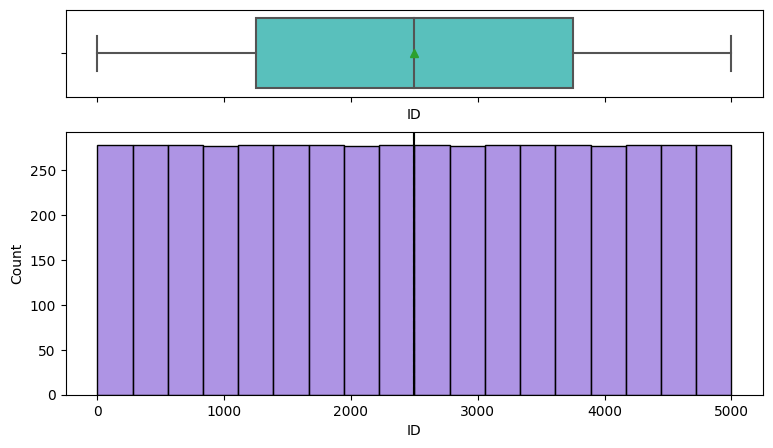

In [9]:
#Visualizing the ID column
histogram_boxplot(data = loan_p, feature = 'ID')

This is normal distribution. No outlier is also dictated 

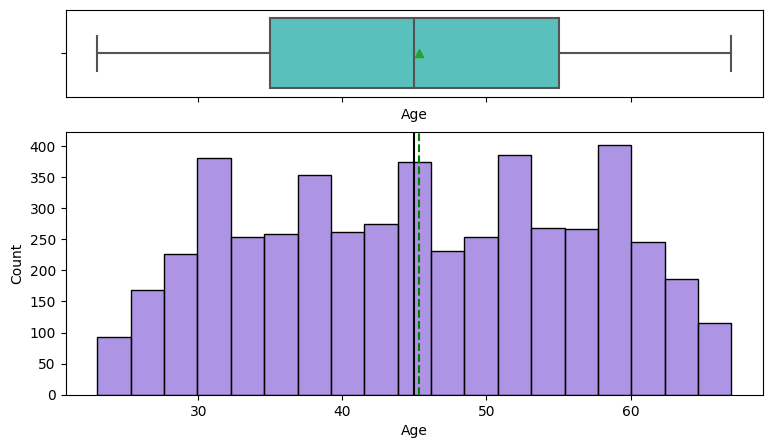

In [10]:
#Visualizing the age column
histogram_boxplot(data = loan_p, feature = 'Age')

This is normal distribution. No outlier is also dictated

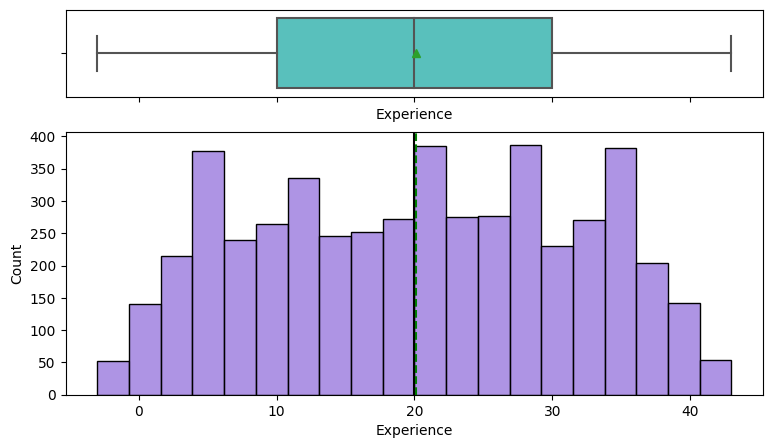

In [11]:
#Visualizing the Experience column
histogram_boxplot(data = loan_p, feature = 'Experience')

This is normal distribution. No outlier is also dictated

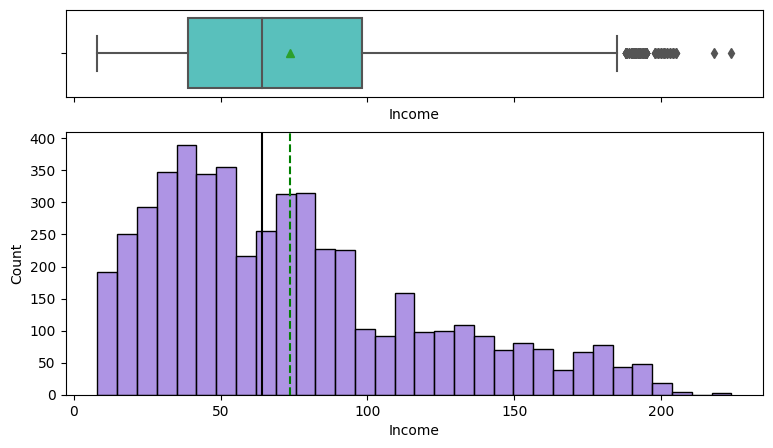

In [12]:
#Visualizing the Income column
histogram_boxplot(data = loan_p, feature = 'Income')

The distribution is skewed towards the right. This is not a normal distributon. Outliers was also dictated in the dataset

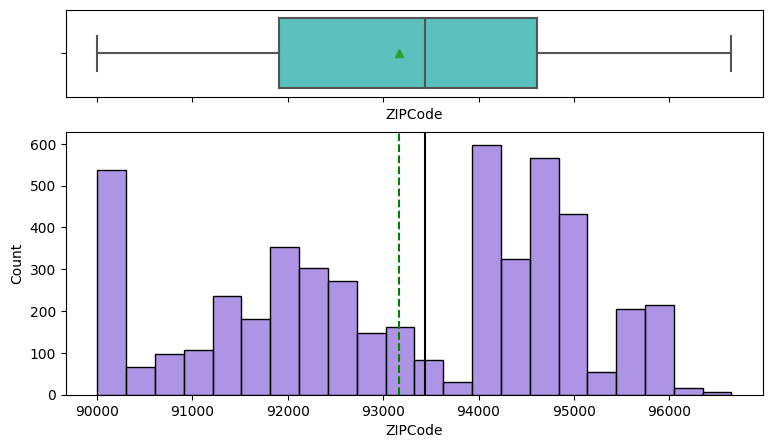

In [13]:
#Visualizing the Zipcode column
histogram_boxplot(data = loan_p, feature = 'ZIPCode')

The distribution is not well distributed. The mean and the median are also not close. However, there are no ooutlier dictated 

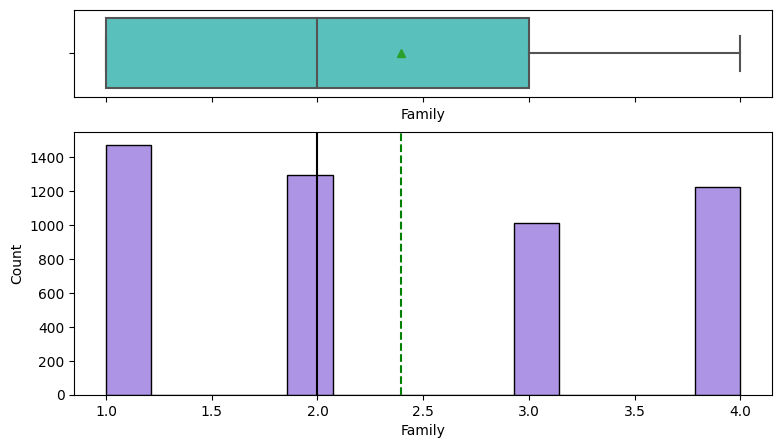

In [14]:
#Visualizing the Family column
histogram_boxplot(data = loan_p, feature = 'Family')

The distribution is not well distributed. The mean and the median are also not close. However, there are no ooutlier dictated

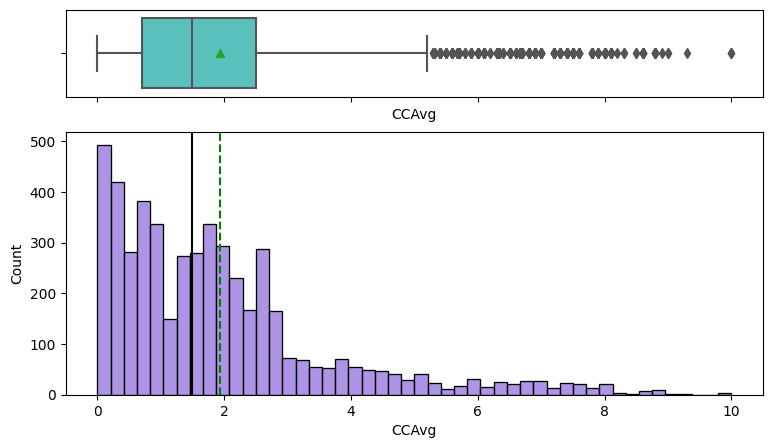

In [15]:
#Visualizing the CCAvg column
histogram_boxplot(data = loan_p, feature = 'CCAvg')

The distribution skewed to the right.There als also outliers that were dictated

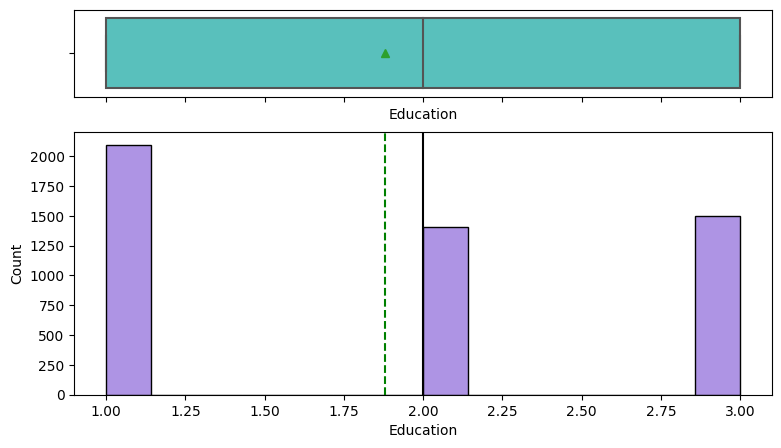

In [16]:
#Visualizing the Education column
histogram_boxplot(data = loan_p, feature = 'Education')

The distribution is not well distributed. The mean and the median are also not close. However, there are no ooutlier dictated

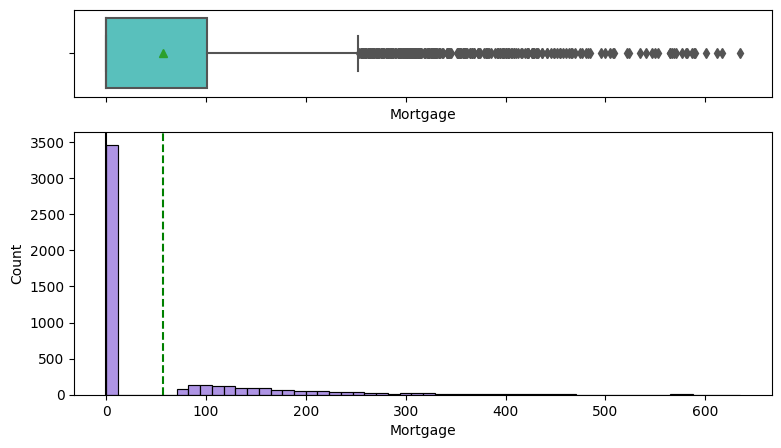

In [17]:
#Visualizing the Mortgage column
histogram_boxplot(data = loan_p, feature = 'Mortgage')

This is not well distributed. Outliers between 500 and above at the x-axis

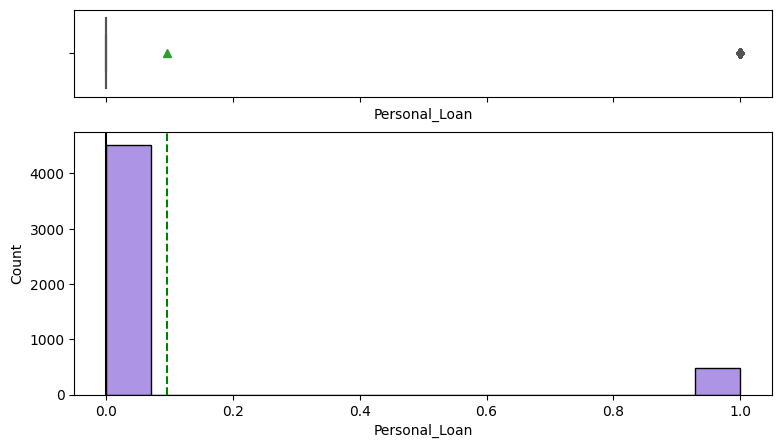

In [18]:
#Visualizing the Personal_Loan column
histogram_boxplot(data = loan_p, feature = 'Personal_Loan')

The distribution is not normal. we also have outlier dictated around 1.0. The data seems to be between only 1s and 0s. Outlier is also detected

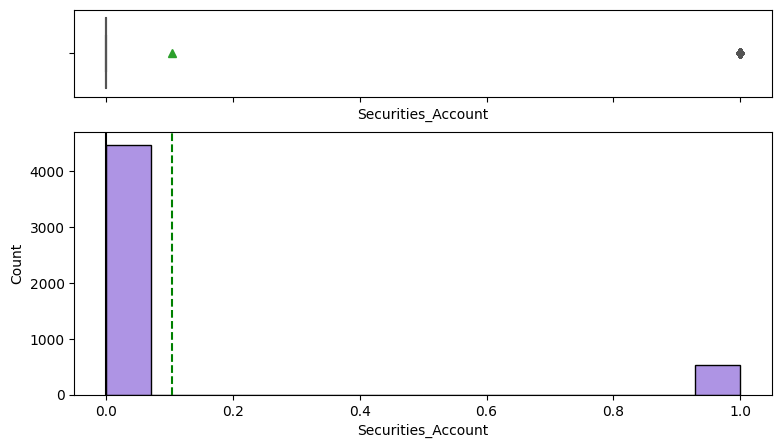

In [19]:
#Visualizing the Securities_Account column
histogram_boxplot(data = loan_p, feature = 'Securities_Account')

The distribution is not normal. we also have outlier dictated around 1.0. The data seems to be between only 1s and 0s. Outlier is also detected

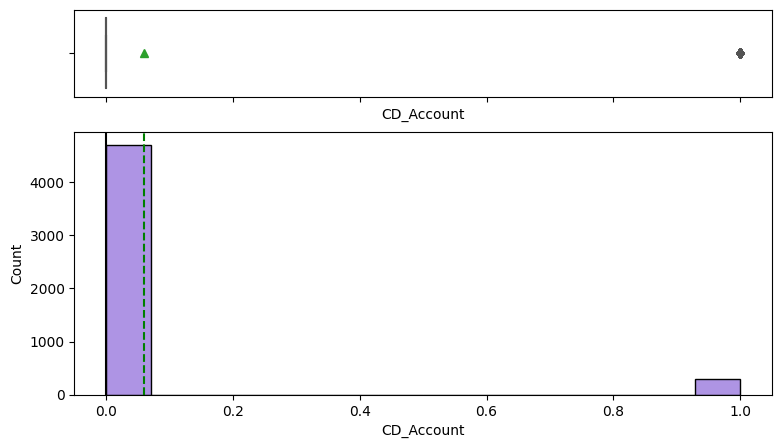

In [20]:
#Visualizing the CD_Account column
histogram_boxplot(data = loan_p, feature = 'CD_Account')

The distribution is not normal. we also have outlier dictated around 1.0. The data seems to be between only 1s and 0s. Outlier is also detected

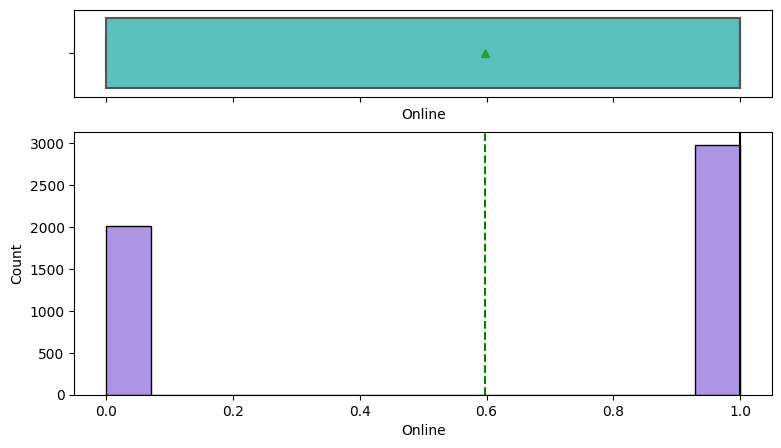

In [21]:
#Visualizing the Online column
histogram_boxplot(data = loan_p, feature = 'Online')

The distribution is not normal. we also have outlier dictated around 1.0. The data seems to be between only 1s and 0s.

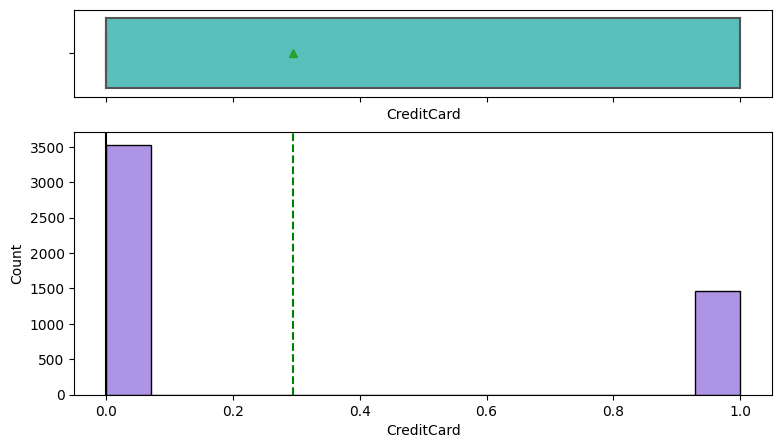

In [22]:
#Visualizing the CreditCard column
histogram_boxplot(data = loan_p, feature = 'CreditCard')

The distribution is not normal. we also have outlier dictated around 1.0. The data seems to be between only 1s and 0s.

In [23]:
#import mu Univariate function to Visualize the variables
from utils_univar_cat import labeled_barplot

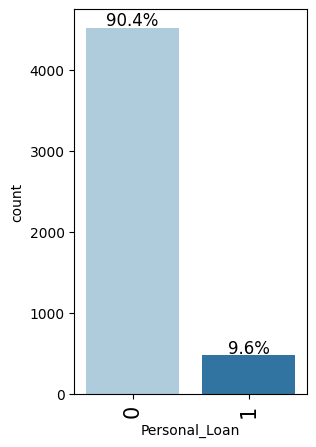

In [24]:
#Visualizing the Personal Loan
labeled_barplot(data = loan_p, feature = 'Personal_Loan', perc = True)

This implies that 90.4% of customers did not take personal loans. Only 9.6% do

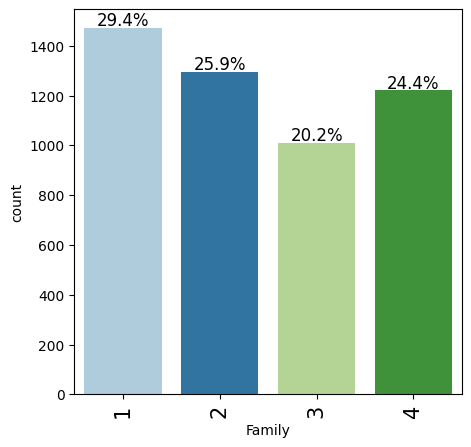

In [25]:
#Visualizing the Family
labeled_barplot(data = loan_p, feature = 'Family', perc = True)

The family sizes between size 1 to 4 are above 20%. However, family with size 1 are higher in number with a percentatge of 29.4% while family with size of 3 constitutes 20.2% of the customers

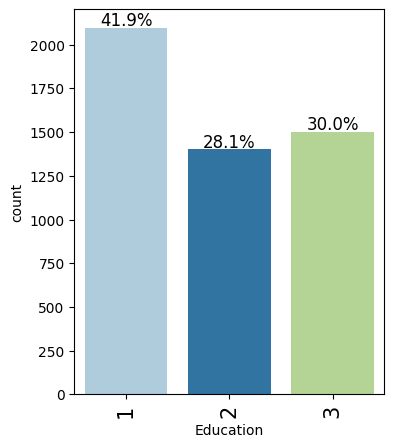

In [26]:
#Visualizing the Education
labeled_barplot(data = loan_p, feature = 'Education', perc = True)

People on the education level 1 constitutes most of the population of our customers.This means that most of them may have low income. We need to plan personal loan that will suite their income and appealing to them.

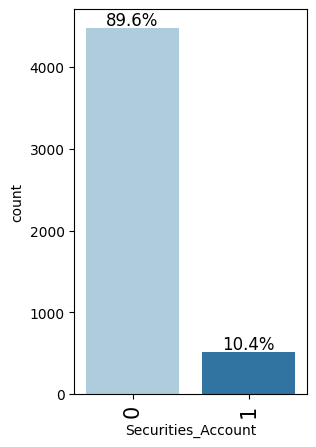

In [27]:
#Visualizing the Securities_Account
labeled_barplot(data = loan_p, feature = 'Securities_Account', perc = True)

None of the customers has Security account with the bank. This is a starting point for our marketing. We will need to start talking to our customers to have a security account with our bank.

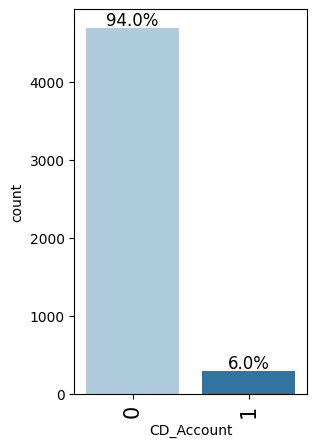

In [28]:
#Visualizing the certificate of deposit (CD)
labeled_barplot(data = loan_p, feature = 'CD_Account', perc = True)

None of the customers has Certificate of deposit account with the bank. This is a starting point for our marketing. We will need to start talking to our customers to have a security account with our bank.

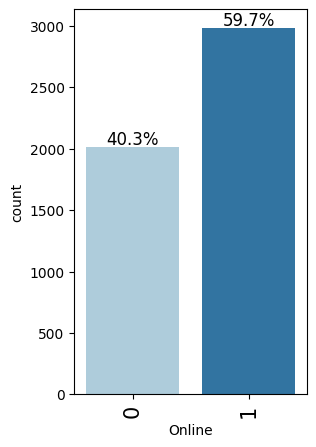

In [29]:
#Visualizing the access to  internet banking facilities
labeled_barplot(data = loan_p, feature = 'Online', perc = True)

59.7% percent of the customers has access to internet banking facility. The internet banking can be avenue to get customers to have access to personal loan by automating it with the personal loan validation and access.

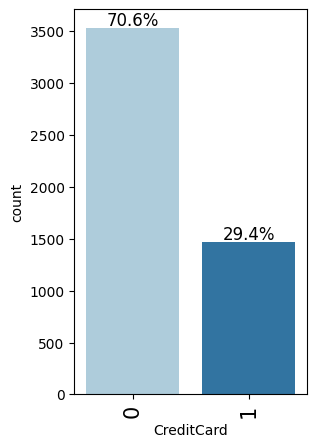

In [30]:
#Visualizing the access the credit card usage
labeled_barplot(data = loan_p, feature = 'CreditCard', perc = True)

This showed that 70.6% of customers that were issued with creditcard makes use of it while on 29.4% does not use it. If this is the case, we may need to look further at the usage and how we can introduce more features of personal loan to it

### Bivariate Visiualization and Analysis

In [31]:
# Create function for scatterplot visualize numerical variables
def customer_plot(x,y, title,data =loan_p):
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = x, y = y, data = loan_p)
    plt.title(title)
    plt.show()

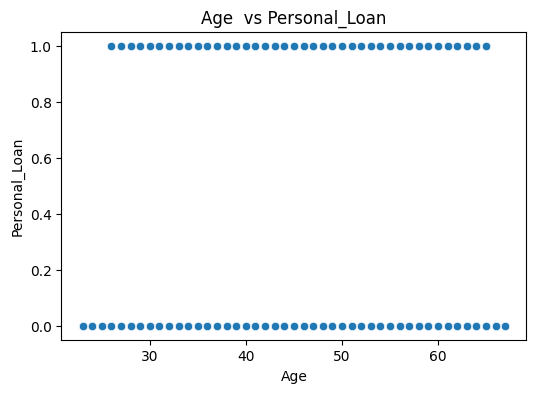

In [32]:
# Visualization of Age vs personal_Loan
customer_plot(x = 'Age', y = 'Personal_Loan',
             title = 'Age  vs Personal_Loan')

There is no relationship between the Age and personal loan

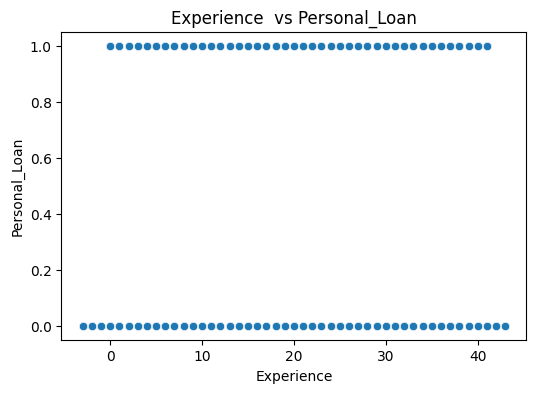

In [33]:
# Visualization of Experience vs Personal_ Loan
customer_plot(x = 'Experience', y = 'Personal_Loan',
             title = 'Experience  vs Personal_Loan')

There is no relationship between the Experinece and personal loan

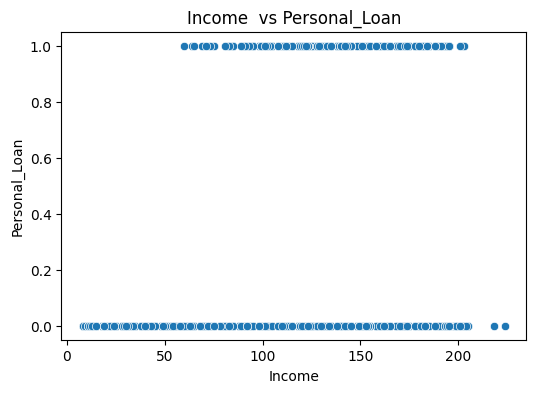

In [34]:
# Visualization of Income vs Personal_ Loan
customer_plot(x = 'Income', y = 'Personal_Loan',
             title = 'Income  vs Personal_Loan')

There is no relationship between the Experinece and personal loan

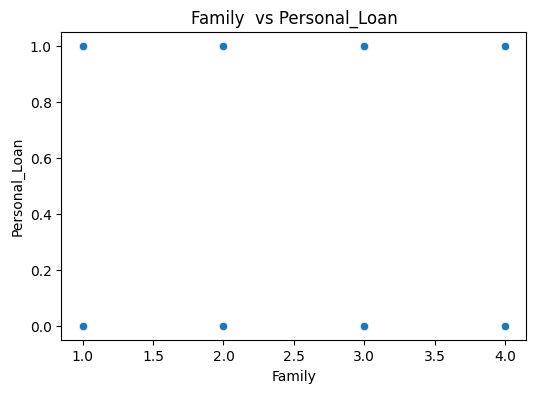

In [35]:
# Visualization of  Family vs Personal_ Loan
customer_plot(x = 'Family', y = 'Personal_Loan',
             title = 'Family  vs Personal_Loan')

No relationship exist between this variable and personal loan

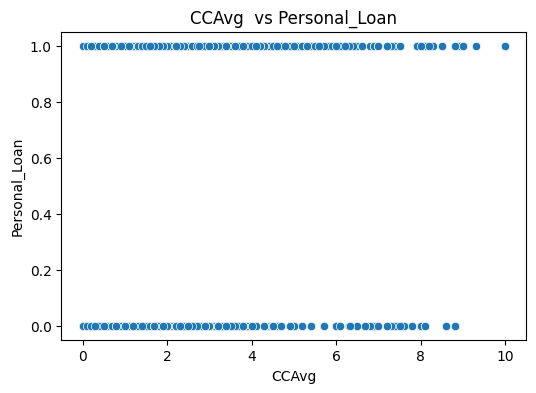

In [36]:
# Visualization of  CCAvg vs Personal_ Loan
customer_plot(x = 'CCAvg', y = 'Personal_Loan',
             title = 'CCAvg  vs Personal_Loan')

No relationship exist between this variable and personal loan

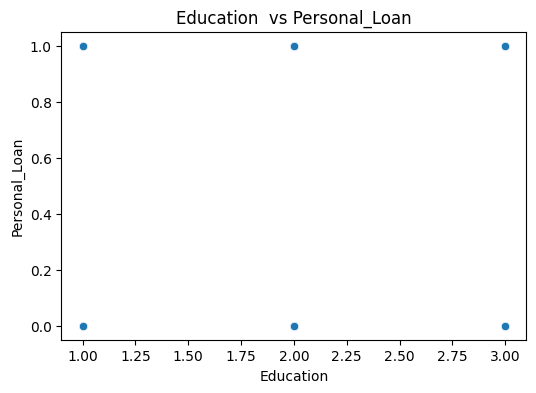

In [37]:
# Visualization of  Education vs Personal_ Loan
customer_plot(x = 'Education', y = 'Personal_Loan',
             title = 'Education  vs Personal_Loan')

No relationship exist between this variable and personal loan

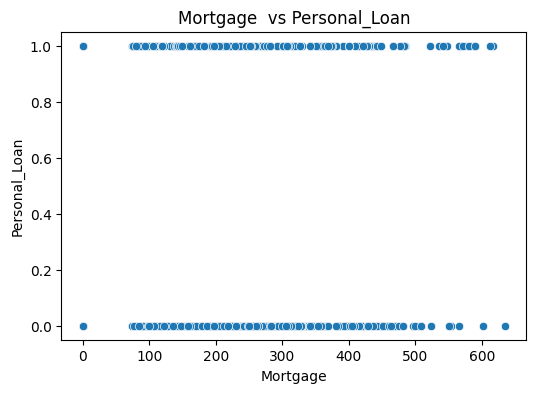

In [38]:
# Visualization of  Mortgage vs Personal_ Loan
customer_plot(x = 'Mortgage', y = 'Personal_Loan',
             title = 'Mortgage  vs Personal_Loan')

No relationship exist between this variable and personal loan

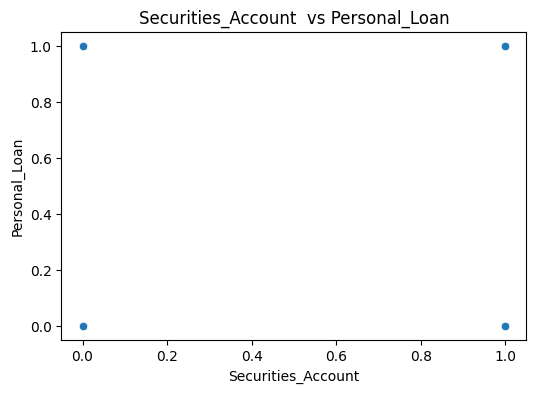

In [39]:
# Visualization of  Securities_Account vs Personal_ Loan
customer_plot(x = 'Securities_Account', y = 'Personal_Loan',
             title = 'Securities_Account  vs Personal_Loan')

No relationship exist between this variable and personal loan

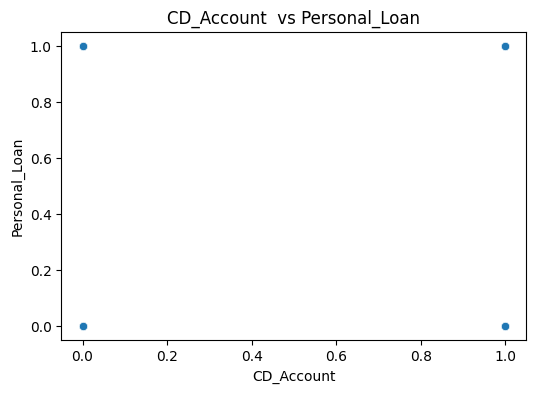

In [40]:
# Visualization of  CD_Account vs Personal_ Loan
customer_plot(x = 'CD_Account', y = 'Personal_Loan',
             title = 'CD_Account  vs Personal_Loan')

No relationship exist between this variable and personal loan

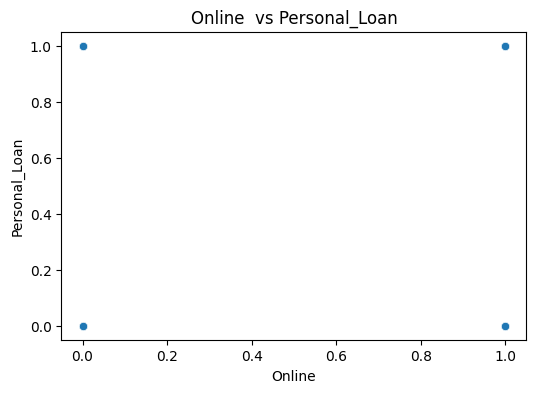

In [41]:
# Visualization of Online vs Personal_ Loan
customer_plot(x = 'Online', y = 'Personal_Loan',
             title = 'Online  vs Personal_Loan')

No relationship exist between this variable and personal loan

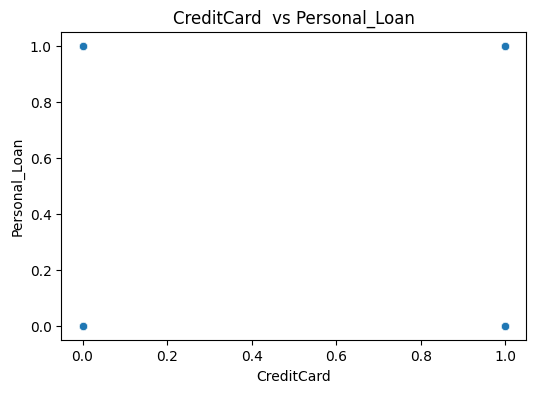

In [42]:
# Visualization of CreditCard vs Personal_ Loan
customer_plot(x = 'CreditCard', y = 'Personal_Loan',
             title = 'CreditCard  vs Personal_Loan')

No relationship exist between this variable and personal loan

#### Coreleation of the numerical variable

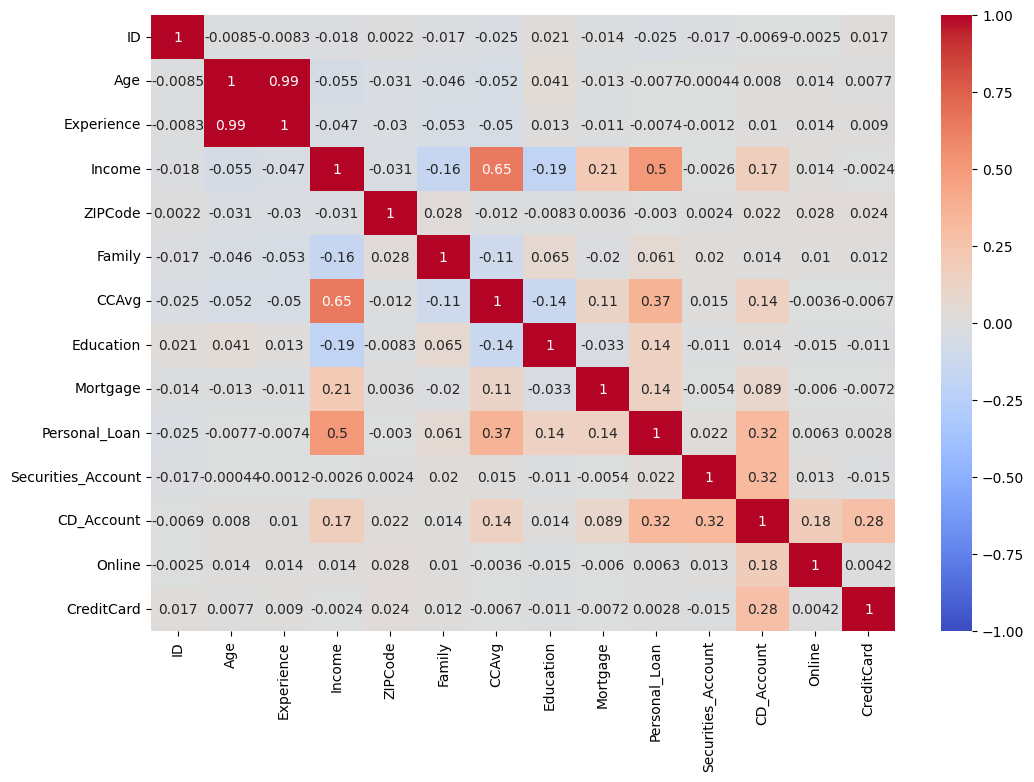

In [44]:
#Coreleation of the numerical variables

num_data = loan_p.select_dtypes(include = 'number')

# calculate correlation
mat_cor = num_data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(mat_cor, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

Income seems to be the only variable with strong correlation  of 0.5 with personal loan. Others variables seems to contributes a little to the the target variable. There are couple of multicollinearity between other independent variables like in Experinece & Age and Income & CCAvg with collinerity of 0.99 and 0.65 respectively. 

In [45]:
loan_p.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The of values of mean and standard deviation like 0.294000 and 0.455637 in the columns like Credicard, Security_Account,Online, Personal_Loan and CD_Account suggests that there are some inconsistencies or incorrect data in the column. I need to clean up the columns to ensure that they contains only valid binary values (0 or1).

In [46]:
#explore the Credicard column
print(loan_p['Online'].unique())
print(loan_p['CreditCard'].unique())
print(loan_p['CD_Account'].unique())
print(loan_p['Securities_Account'].unique())
print(loan_p['Personal_Loan'].unique())

[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


Further exploration using .unique showed that there are no inconsistence. I will have to move to Outlier Detection and Handling

In [47]:
#explore the column of Experience
loan_p['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

- values like -2 and -3 was observed in the data. This needs to be cleaned out.

In [48]:
loan_p['Experience'] = loan_p['Experience'].abs()


In [49]:
#explore the column of Experience
loan_p['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [50]:
loan_p.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Outlier Detection and Handling

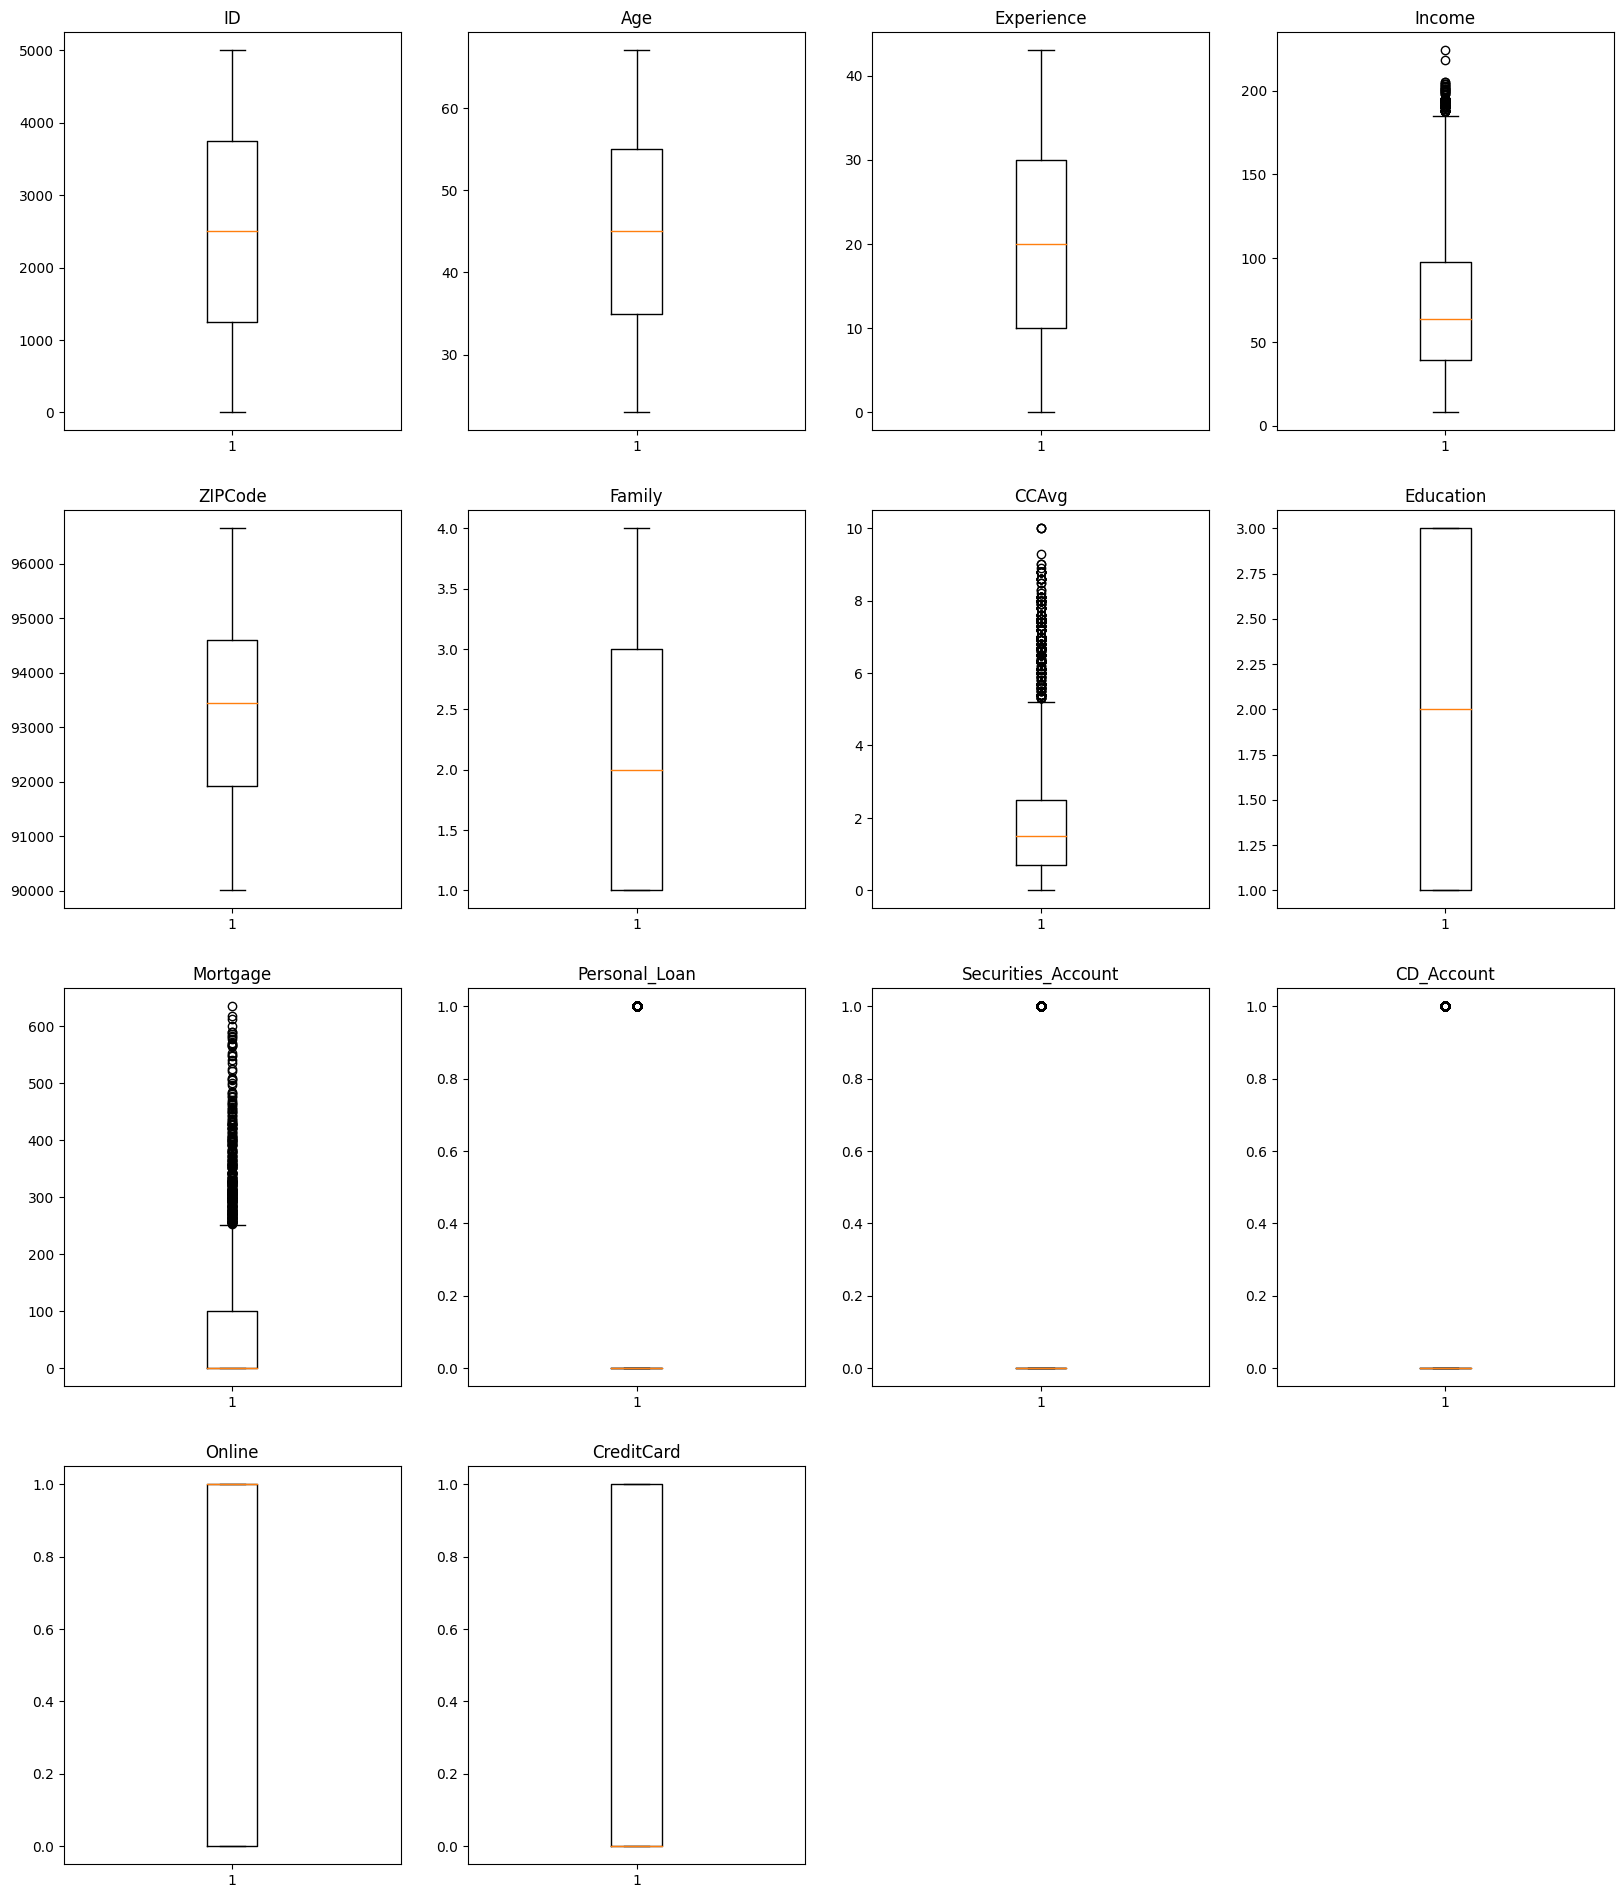

In [51]:
#Using boxplot for the detection
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan_p[variable])
    plt.title(variable)

### Treat Outliers

In [52]:
#Drop the traget variable Price
num_data.drop('Personal_Loan', axis = 1, inplace = True)

In [53]:
# sanity check on numericData
num_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [54]:
#create a function to treate outliers
def treat_outliers(loan_p, col):
    '''
    treat outliers found in variables
    col: str, name of the numerical variable
    videoGame_data: dataframe
    '''
    Q1 = loan_p[col].quantile(0.25) # 25th quantile
    Q3 = loan_p[col].quantile(0.75) # upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    loan_p[col] = np.clip(loan_p[col], lower_whisker, upper_whisker)
    return loan_p

# define a function to treat all the variables

def treat_outliers_all(loan_p,col_list):
    for c in col_list:
        loan_p = treat_outliers(loan_p,c)
    return loan_p

In [55]:
loan_p = treat_outliers_all(loan_p,num_data)

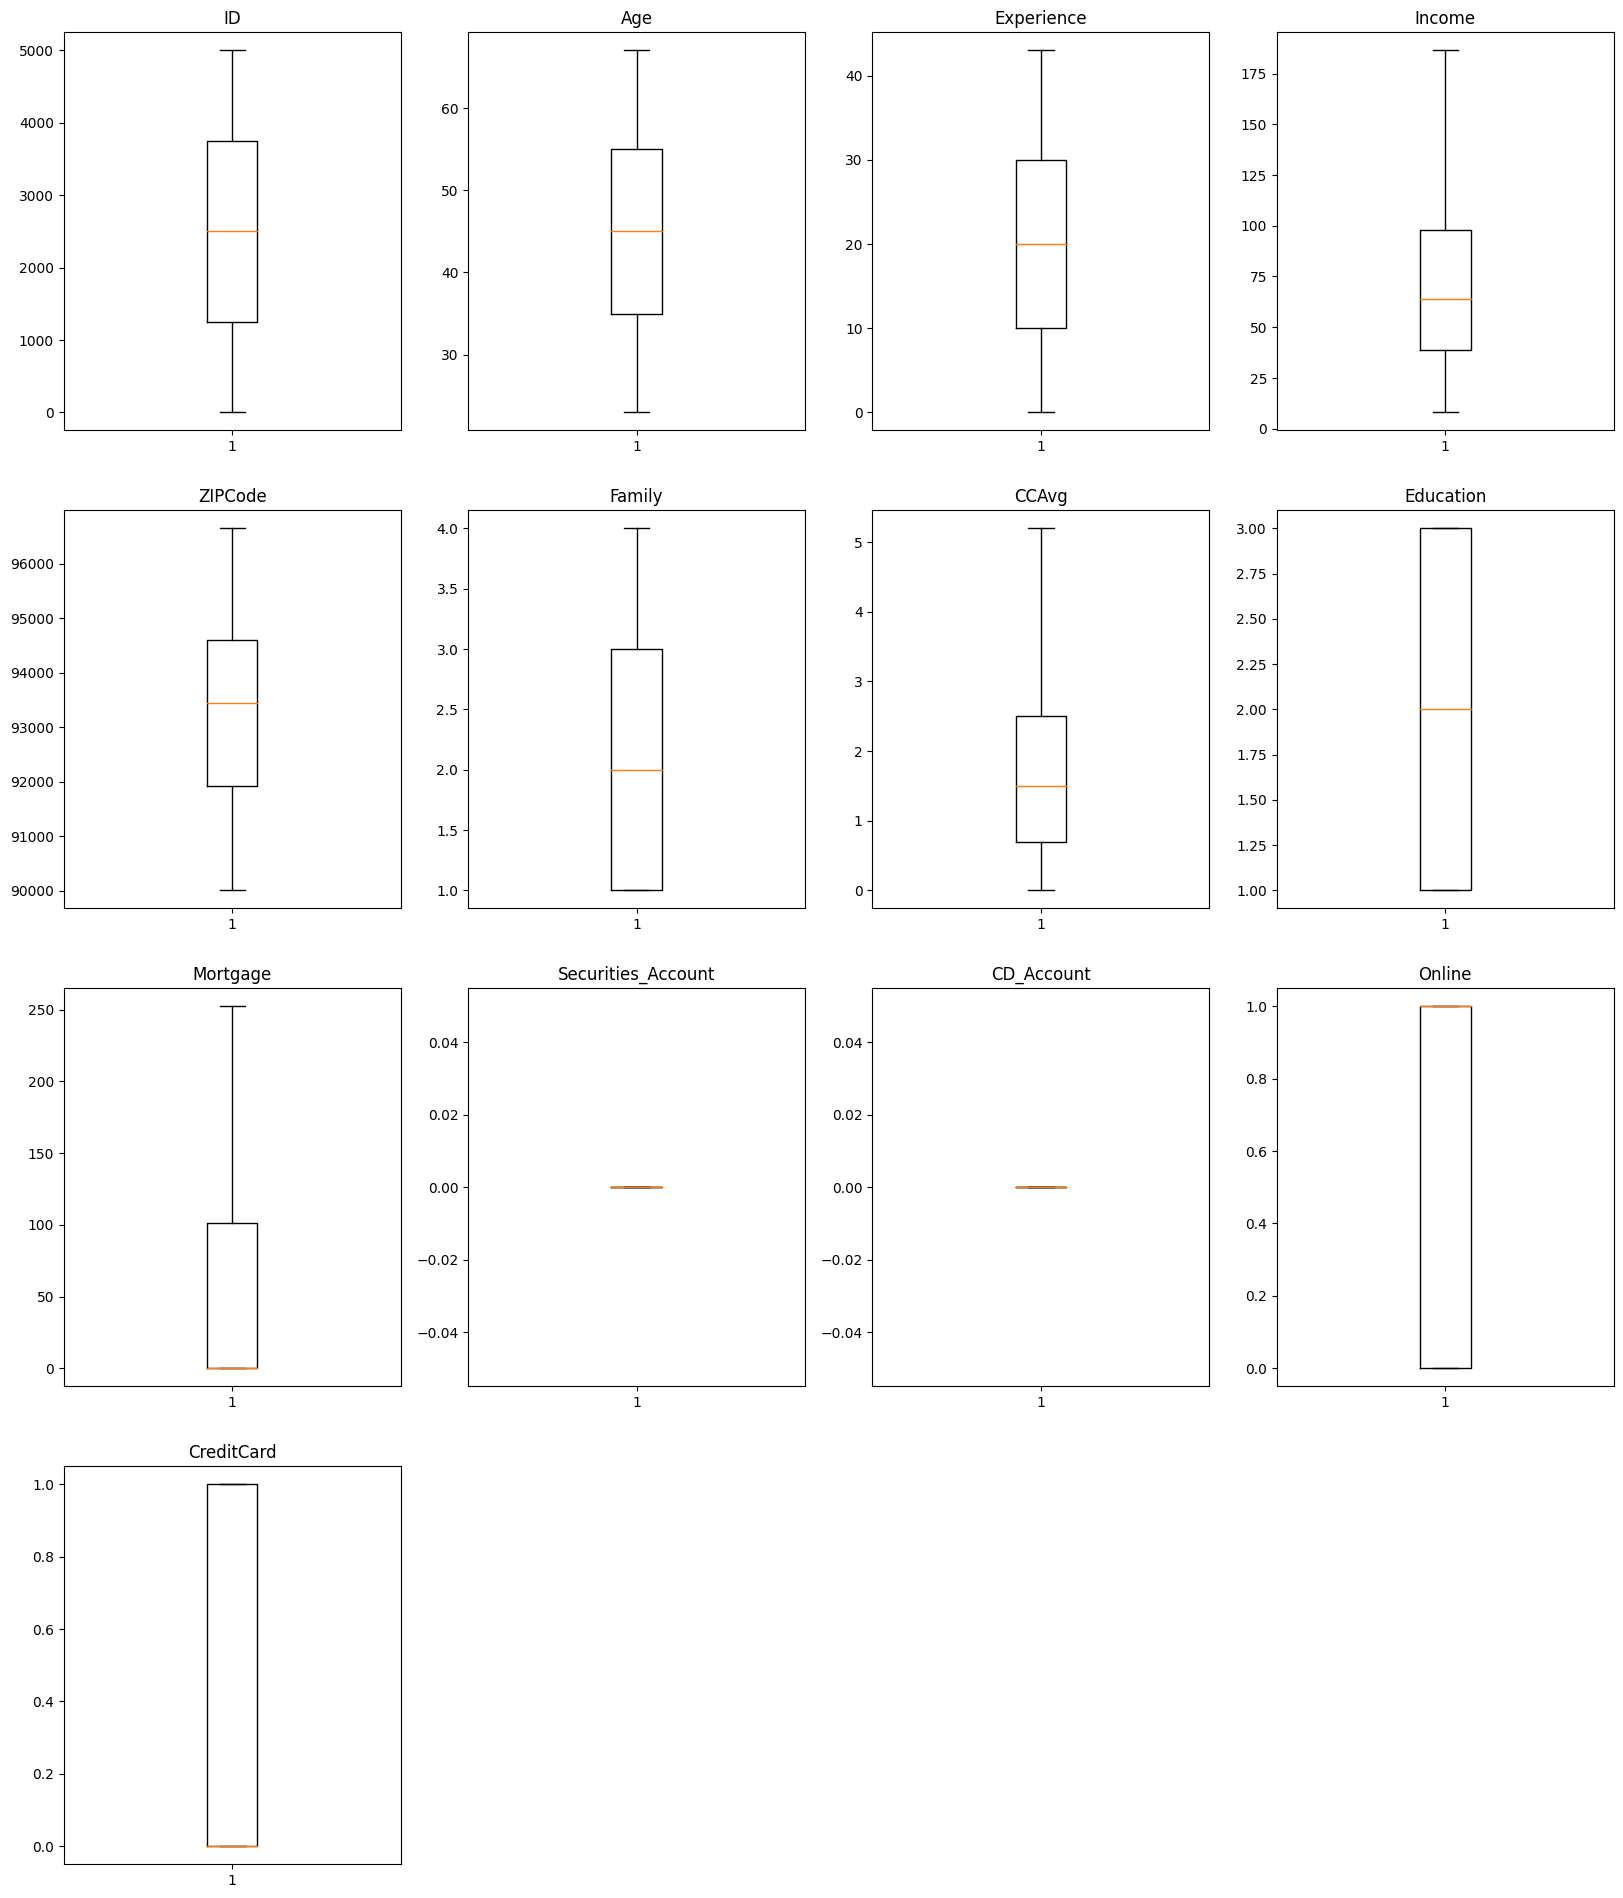

In [56]:
#Using boxplot for the detection
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan_p[variable])
    plt.title(variable)

The outliers found in Income, CCAvg and Mortgage have all been treated

### Build the logistic regression model

#### Feature Selection

In [57]:
#import libry for spliting data
from sklearn.model_selection import train_test_split

#selecting my features
# dropping personal_loan which is my target variable, ID which I believe will not contribute meaningfully.ZIP code should have been dropped but where people lives can also help to provide more information 
x = loan_p.drop(['Personal_Loan', 'ID'], axis=1)
y = loan_p['Personal_Loan']

In [58]:
#split the data into 2 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y)

In [59]:
x_train.shape

(4000, 12)

In [60]:
x_test.shape

(1000, 12)

In [61]:
#checking to ensure that date is maintained after applying stratify
y_train.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [62]:
#Normalize the data using MinMa scaler
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()
x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

In [65]:
#build and train the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)

log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

#### Model Performance Check

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (accuracy_score, recall_score,precision_score,f1_score)

# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

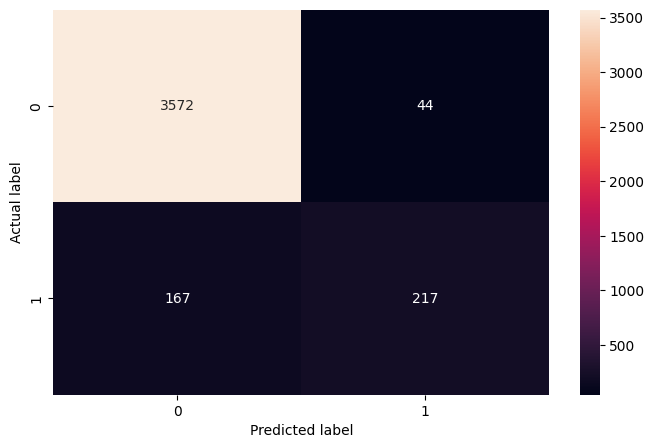

,Accuracy,Recall,Precision,F1-score
0,0.94725,0.565104,0.831418,0.672868


In [69]:
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)
log_reg_train 

- Given a new data that is similar to the one used to build this model, the model will be able to predict accurately 94.7% of the personal loan behavious of the customer. Please note that the accuracy may not be truth because the data used is imbalance. We will still work on that as we progressess.
- The accuracy score, precision score and F1-score are 56.5%, 83.1% and 67.2% respectively.
- Using Confusion matrix to explain further, The model made good prediction that 217 people will buy the personal loan (True Positive) while 3572 people will not be buying the loan.
- The model also wrongly predicted 44 people will buy the personal loan (FP) while they are likely not going to buy personal loan.
- There is also wrong prediction that 167 people will not buy the perssonal loan while they are likely going to buy the personal loan. 

Despite the precision score and accuracy scores looking good, we will need to explore other building algorithm and also improve on the model to get a better result. It is good to note that the data is still not balanced and may not given us ideal result.

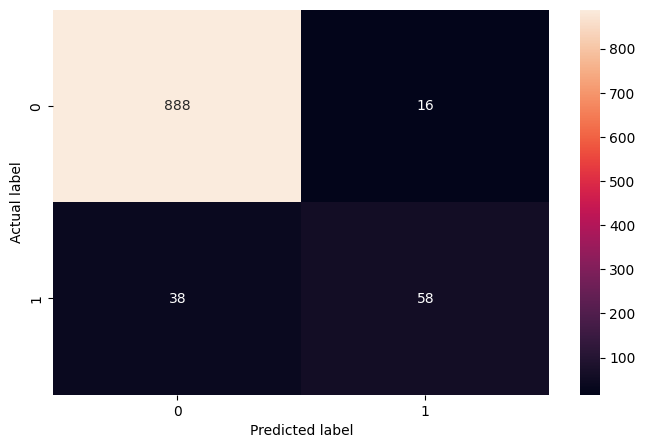

,Accuracy,Recall,Precision,F1-score
0,0.946,0.604167,0.783784,0.682353


In [70]:
log_reg_test = model_performance_classification(log_reg, x_test_sd, y_test)
log_reg_test 

The model seems to have generalized well. However, the data is imbalanced . There is room for improvement to enable us get good result.

### Model Improvement

#### Change the metrics

My concern here is to minimize the false positive where the model showed on traing and test that 44 and 16 people respectively will buy the personal loan when they will not be doing so. This project is predicting the wether a liability customer will buy a personal loan. Wrongly assigning people to group that will buy personal loan when they will not buy will be misleading and will not enable the bank to create a targeted personal loan product. Therefore, to focus on minimizing false positives and improving precision, I will pay closer attention to the precision metric when evaluating and comparing different classification models or tuning the model's threshold.

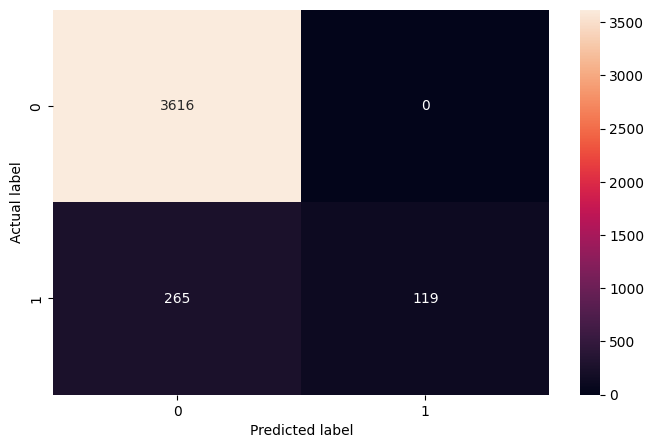

,Accuracy,Recall,Precision,F1-score
0,0.93375,0.309896,1.0,0.473161


In [73]:
#tweek the threshold to 0.9 to gain high precision since I am interested in reducing false positive (FP)
log_reg_train1 = model_performance_classification(log_reg, x_train_sd, y_train, threshold = 0.8)
log_reg_train1 

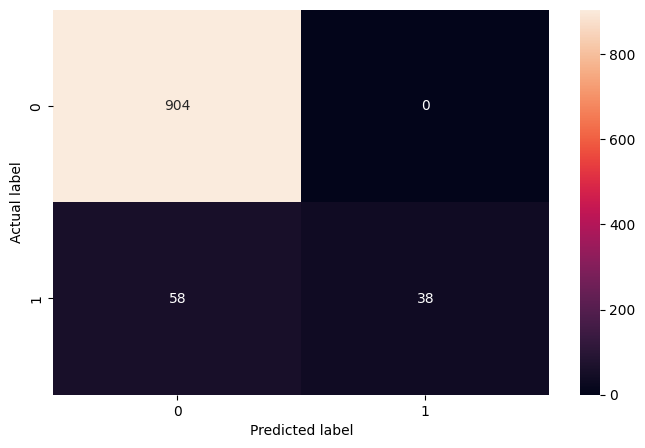

,Accuracy,Recall,Precision,F1-score
0,0.942,0.395833,1.0,0.567164


In [74]:
log_reg_test1 = model_performance_classification(log_reg, x_test_sd, y_test, threshold = 0.8)
log_reg_test1

The performance on precison is very good and this looks like what we are looking for. However, there seems to be overfiting in this model.I will still explore other options through balancing the data and using other models to make my predictions

### Balancing the data

In [75]:
#pip install imblearn
from imblearn.over_sampling import RandomOverSampler, ADASYN,BorderlineSMOTE, SMOTE

In [76]:
smote = SMOTE(random_state=0)
x_sm, y_sm = smote.fit_resample(x,y)

In [77]:
y_sm.value_counts(normalize = True)

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

In [80]:
#split the data into for SMOTE

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size = 0.2)

In [82]:
#normalize the data
scaler = MinMaxScaler()
x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test_sm)

In [83]:
#rebuild the model
log_reg2 = LogisticRegression(random_state = 0)
log_reg2.fit(x_train_sm_sd, y_train_sm)

LogisticRegression(random_state=0)

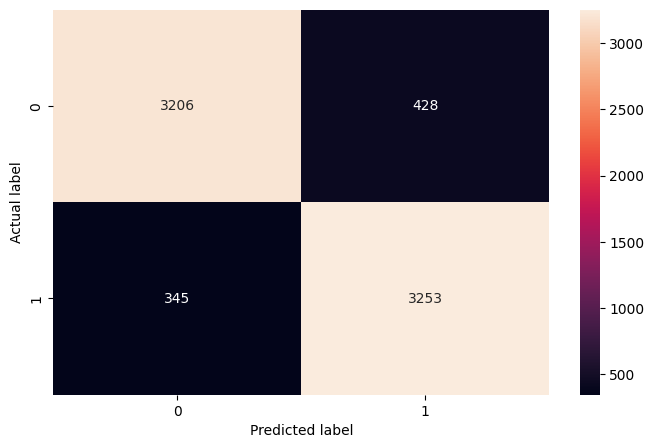

,Accuracy,Recall,Precision,F1-score
0,0.893114,0.904113,0.883727,0.893804


In [84]:
log_reg2_train = model_performance_classification(log_reg2, x_train_sm_sd, y_train_sm)
log_reg2_train 

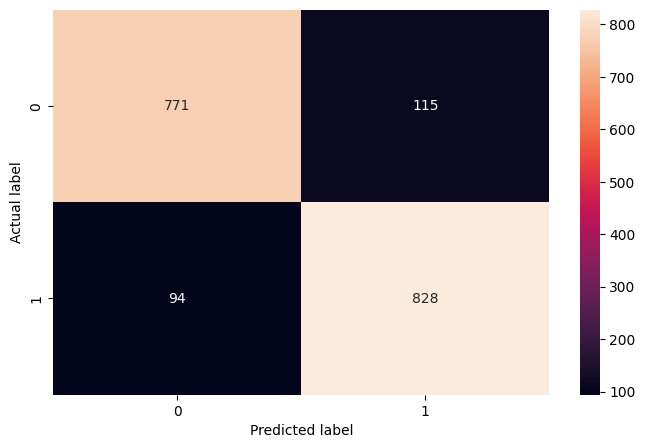

,Accuracy,Recall,Precision,F1-score
0,0.884403,0.898048,0.878049,0.887936


In [85]:
# checking the result on testing to ensure that overfit or underfit did not occur

log_reg2_test = model_performance_classification(log_reg2, x_test_sm_sd, y_test_sm)
log_reg2_test

All the performance metrics looks. Further tweaking of the threshold will be applied to see if there will still be improvement based on the business objectives 

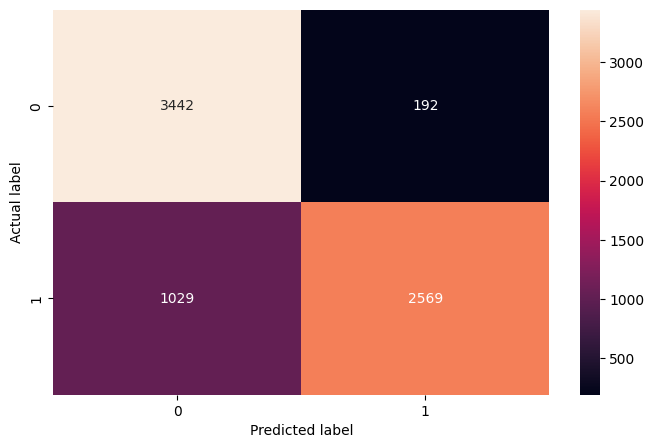

,Accuracy,Recall,Precision,F1-score
0,0.831167,0.714008,0.93046,0.807989


In [88]:
log_reg3_train = model_performance_classification(log_reg2, x_train_sm_sd, y_train_sm, threshold = 0.8)
log_reg3_train 

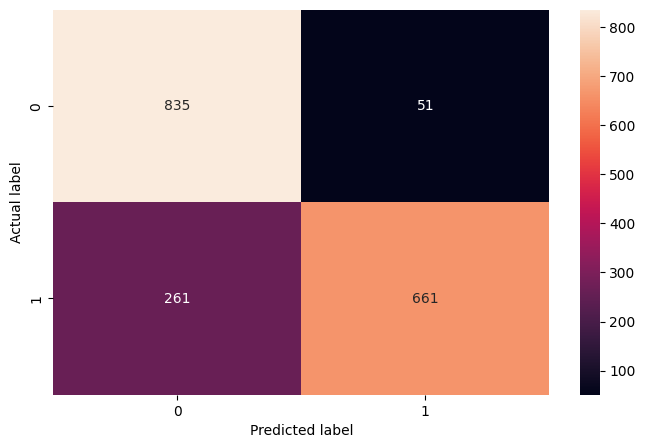

,Accuracy,Recall,Precision,F1-score
0,0.827434,0.71692,0.928371,0.809058


In [89]:
# checking the result on testing to ensure that overfit or underfit did not occur

log_reg3_test = model_performance_classification(log_reg2, x_test_sm_sd, y_test_sm, threshold = 0.8)
log_reg3_test

The logistic model with balanced data and tweaked threshold of 0.8 showed better generalization and good performance metric scores. We still need to explore other algorithms like Decision tree, Random Forest and Gradient Boosting to choose the best model.

### Building model with Decision tree

In [90]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

In [91]:
dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(random_state=0)

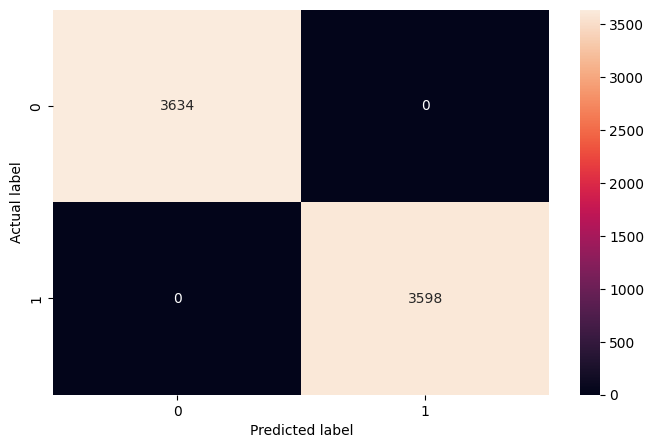

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [92]:
dec_tree_train = model_performance_classification(dec_tree, x_train_sm, y_train_sm)
dec_tree_train 

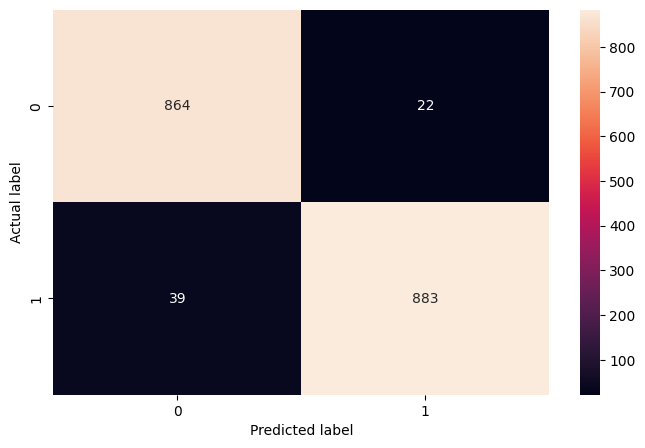

,Accuracy,Recall,Precision,F1-score
0,0.966261,0.957701,0.975691,0.966612


In [93]:
dec_tree_test = model_performance_classification(dec_tree, x_test_sm, y_test_sm)
dec_tree_test

This performed well. However, it looks there is slight overfiting.

#### Perform hyperparameter tuning in the class weight to tacke the over fitting

In [94]:
#train and build the model
dec_tree1 = DecisionTreeClassifier(random_state=0, class_weight = {0:0.1, 1:0.9})
dec_tree1.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

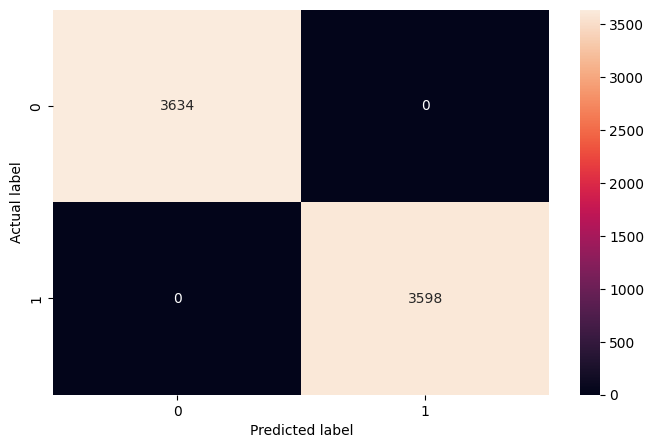

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [95]:
#check the performance on training
dec_tree_train1 = model_performance_classification(dec_tree1, x_train_sm, y_train_sm)
dec_tree_train1 

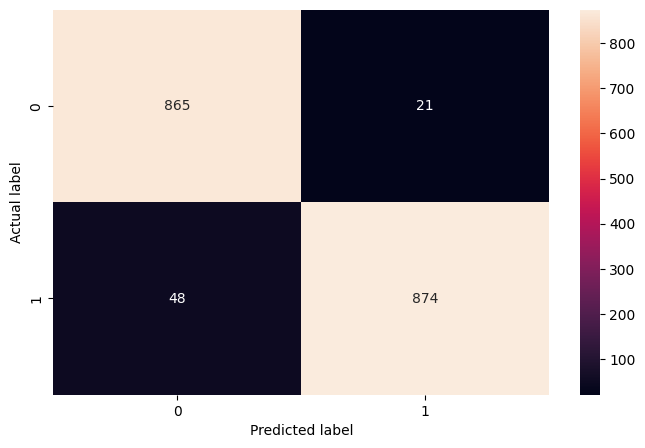

,Accuracy,Recall,Precision,F1-score
0,0.961836,0.947939,0.976536,0.962025


In [96]:
dec_tree_test1 = model_performance_classification(dec_tree1, x_test_sm, y_test_sm)
dec_tree_test1 

There seems to be no much  difference before applying the hyperameter tuning

#### Applying pre-prunning strategy on the decision tree algorithm

In [97]:
#train and build the model
dec_tree2 = DecisionTreeClassifier(random_state=0, max_depth=4)
dec_tree2.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

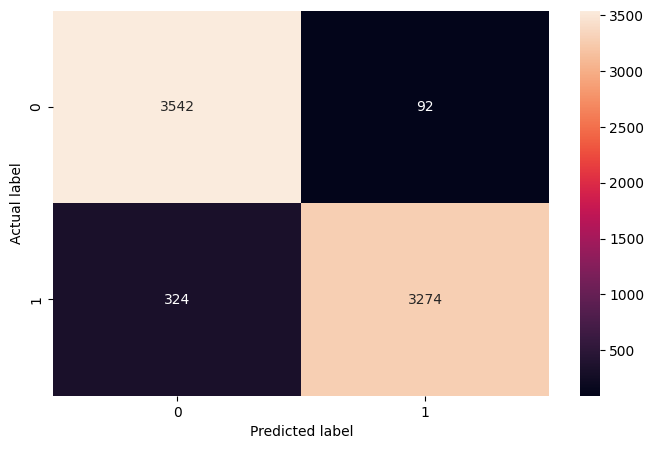

,Accuracy,Recall,Precision,F1-score
0,0.942478,0.90995,0.972668,0.940264


In [98]:
#check the performance on training
dec_tree_train2 = model_performance_classification(dec_tree2, x_train_sm, y_train_sm)
dec_tree_train2 

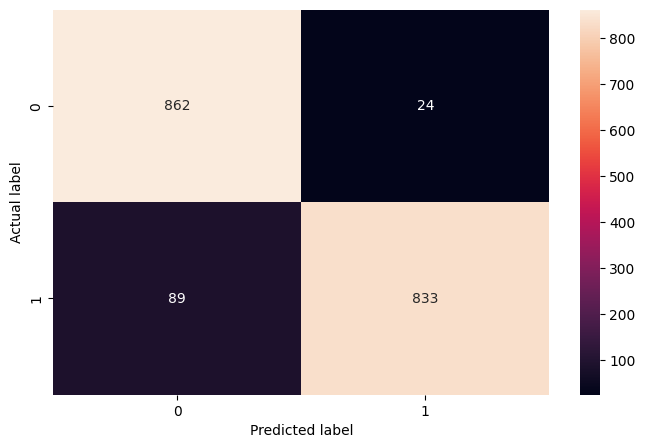

,Accuracy,Recall,Precision,F1-score
0,0.9375,0.903471,0.971995,0.936481


In [99]:
dec_tree_test2 = model_performance_classification(dec_tree2, x_test_sm, y_test_sm)
dec_tree_test2

The decison tree model with hyperameter tuning of max_depth of 4 performed excellently well than other Decison tree models built earlier. It also did better that Logistic regression models built. We will howver, explore Random Forest and Gradient Boosting algorithms

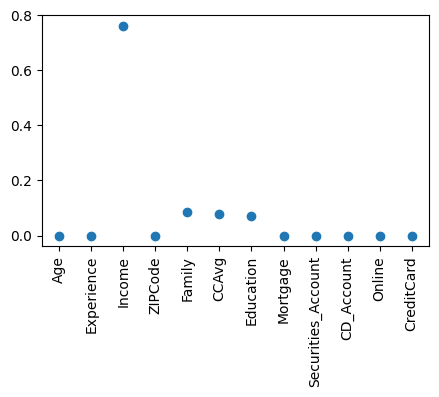

In [123]:
#feature of importance for the selected model

plt.figure(figsize = (5, 3))
plt.plot(dec_tree2.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation = 90)
plt.show()

The income variable showed a key relationship with the target variable (personal_loan). Other variables like Family, Edudaction and Average spending on credit card per month (CCAvg)showed a weak relationship with the target variable.

### Model Building with Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [102]:
#instantiate the classifier
rf = RandomForestClassifier(random_state=0)

#train the model
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=0)

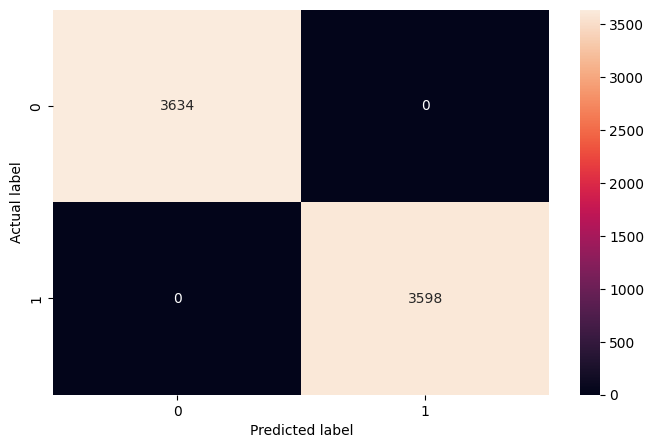

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [103]:
rf_train = model_performance_classification(rf,x_train_sm, y_train_sm)
rf_train

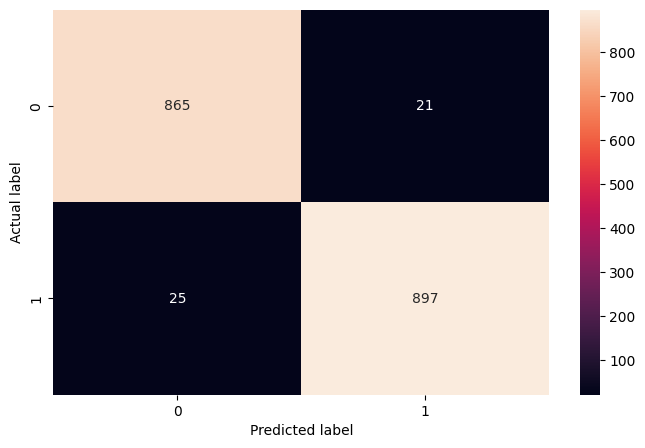

,Accuracy,Recall,Precision,F1-score
0,0.974558,0.972885,0.977124,0.975


In [104]:
rf_test = model_performance_classification(rf,x_test_sm, y_test_sm)
rf_test

There is still some overfiting. Although the performance is very good

#### Perform hyperameter tuning on the Random Forest model by setting the max_dep to 4 to check the performance

In [107]:
#instantiate the classifier
rf1 = RandomForestClassifier(random_state=0, max_depth = 4)

#train the model
rf1.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, random_state=0)

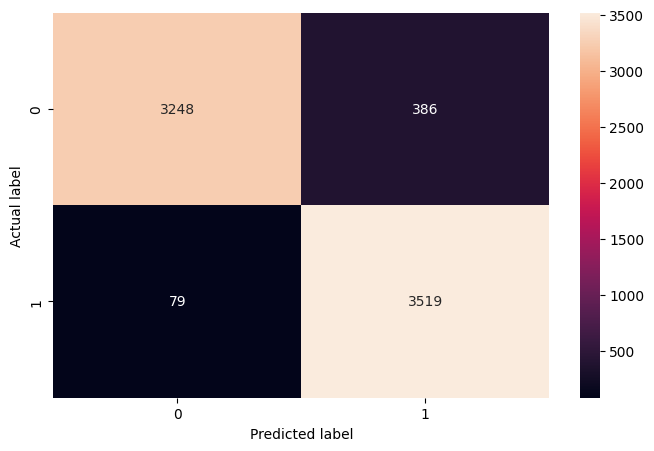

,Accuracy,Recall,Precision,F1-score
0,0.935702,0.978043,0.901152,0.938025


In [108]:
#check the performance on training
rf1_train = model_performance_classification(rf1,x_train_sm, y_train_sm)
rf1_train

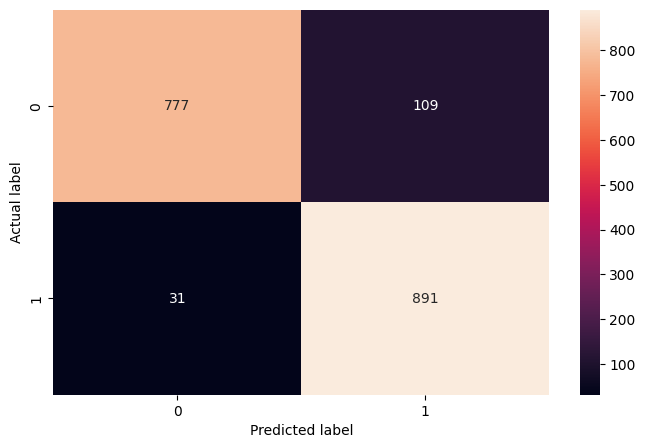

,Accuracy,Recall,Precision,F1-score
0,0.922566,0.966377,0.891,0.927159


In [109]:
#check the performance on training
rf1_test = model_performance_classification(rf1,x_test_sm, y_test_sm)
rf1_test

- The model generalized well. However, the mdecison tree model with hyperameter tuning of max_depth of 4 is still better than this as the performance metrics on both training and test are better than that of RandomForest with max_depth of 4. 
- For example, the precision score for Decision tree model with depth of 4 on training and test are 0.972668 and 0.971995 while the same precison score for Random Forest with max depth of 4 are 0.901152 and 0.891. 
- The same thing also applied with other performance metric scores like Accuracy, recall and F1-score.

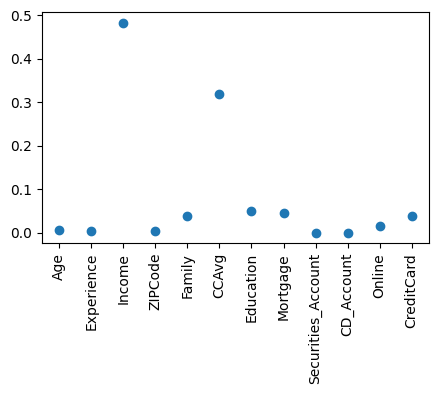

In [113]:
#feature of importance for the selected model

plt.figure(figsize = (5, 3))
plt.plot(rf1.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation = 90)
plt.show()

The income variable and and Average spending on credit card per month (CCAvg) showed a key relationship with the target variable (personal_loan). Other variables like Family, Edudaction, Mortgage and Credit card showed a weak relationship with the target variable.

### Model Building with Gradient Boosting

In [115]:
#import the gradient boosting model
gb = GradientBoostingClassifier(random_state = 0)

#train the model
gb.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=0)

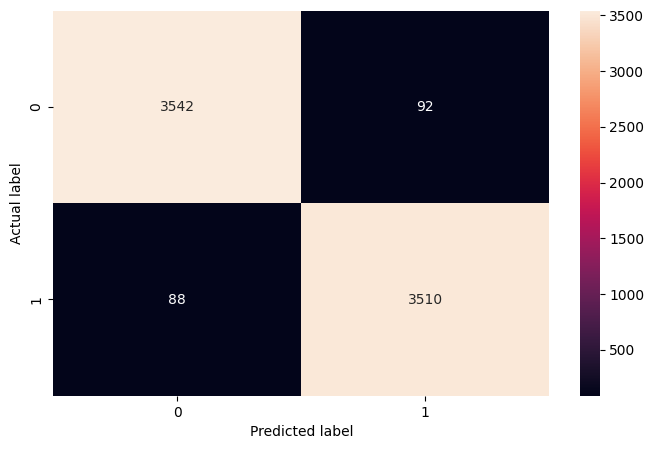

,Accuracy,Recall,Precision,F1-score
0,0.975111,0.975542,0.974459,0.975


In [116]:
#check the performance on training
gb_train = model_performance_classification(gb,x_train_sm, y_train_sm)
gb_train

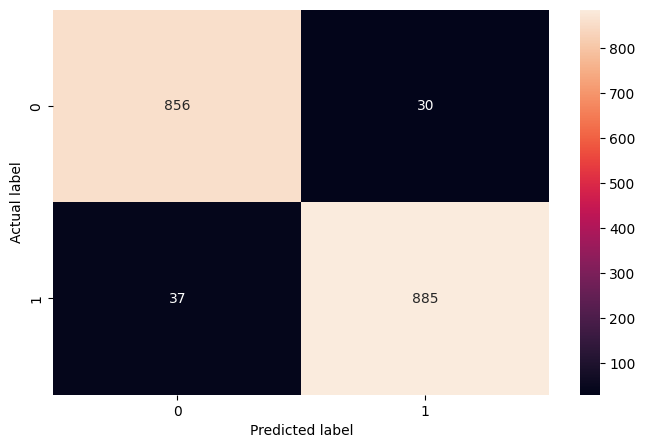

,Accuracy,Recall,Precision,F1-score
0,0.962942,0.95987,0.967213,0.963527


In [117]:
#check the performance on test
gb_test = model_performance_classification(gb,x_test_sm, y_test_sm)
gb_test

The performance on bothe training and test generalized well and can be used to build model. However, that of decision tree is still better. I will also push it further to try that seting the max depth to 4

#### Applying the hyperameter tuning by setting the max_ depth to 4

In [118]:
#import the gradient boosting model
gb1 = GradientBoostingClassifier(random_state = 0, max_depth = 4)

#train the model
gb1.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(max_depth=4, random_state=0)

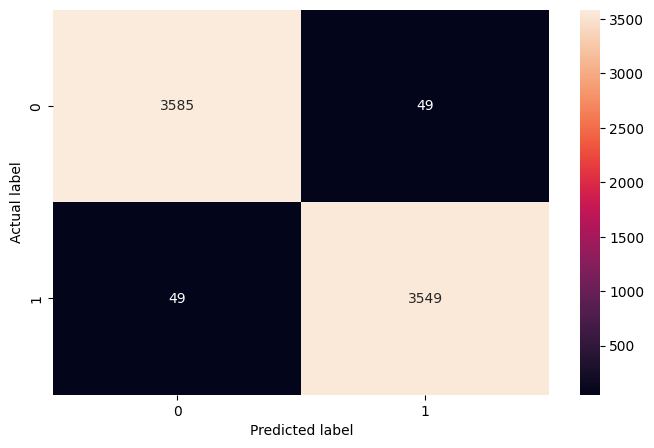

,Accuracy,Recall,Precision,F1-score
0,0.986449,0.986381,0.986381,0.986381


In [119]:
#check the performance on training
gb1_train = model_performance_classification(gb1,x_train_sm, y_train_sm)
gb1_train

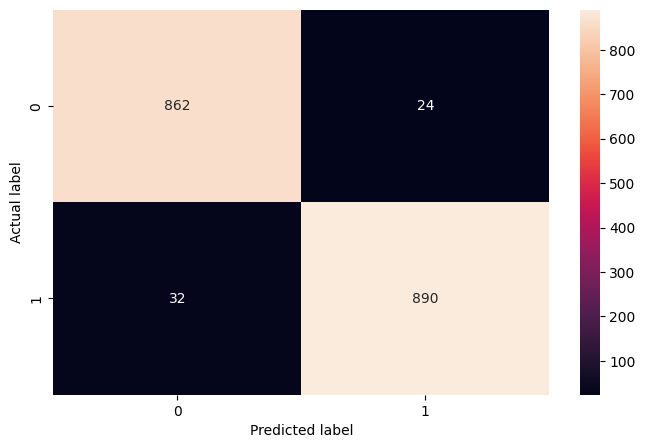

,Accuracy,Recall,Precision,F1-score
0,0.969027,0.965293,0.973742,0.969499


In [120]:
#check the performance on test
gb1_test = model_performance_classification(gb1,x_test_sm, y_test_sm)
gb1_test

The Gradient Boosting with max depth of 4 generalized very well and precison score was both high on training and testing. The false positive like in the decision tree with max depth of 4 is 24 which implies that only 24 people were predicted that they will buy personal loan which is false. However, the model showed a slight overfiting when compared with the decision tree with max depth of 4.

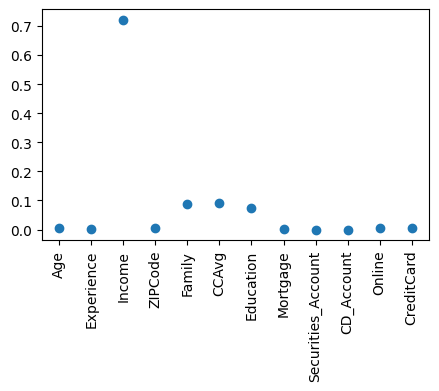

In [121]:
#feature of importance for the selected model

plt.figure(figsize = (5, 3))
plt.plot(gb1.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation = 90)
plt.show()

### Save my prefered predictive model

In [124]:
import pickle

In [131]:
filename = open('decision_tree_model.pk1', 'wb')
pickle.dump(dec_tree2, filename)
filename.close()

In [132]:
# load the saved model
filename2 = open('decision_tree_model.pk1', 'rb')
model = pickle.load(filename2)

In [133]:
#make prediction with model saved
model.predict(x_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### Most signifant variable that contributes to our traget variable

The income variable showed a key relationship with the target variable (personal_loan). Other variables like Family, Edudaction and Average spending on credit card per month (CCAvg)showed a weak relationship with the target variable.

### Actionable Insights - Recommendation

#### Prefered Predictive model for income and the insights about the models built

- From the analysis presented above on the models built and explored, the decision model with max depth of 4 and the random foree model with max depth of 4 performed excelently well. However, the decison tree modell with max of depth seems to perform better hence my reson for choosing it as the model that will be deployed to production. The model will be saved and used for the prediction.Below are further breakdown and reason for chosing the model
- The precision score for Randomforest with max depth of 4 on both training and test are 98.63% and 97.37% while that of Decison tree with max depth of 4 on traing and test are 97.2% and 97.1% respectively.
- The recall on training and test for Randon forest on the same max depth with decision tree are 98.63% and 96.5% while that decision tree are 90.9% and 90.3%.
- Both model showed good generalization and performance, However, Random forest slightly overfitted when compared with the Fradient boosting.
- Both models were able to reduce the False positive that impacts precision to 24.
- This is the reason for choosing the Decision tree with max depth of 4 over other models built

#### Data Insights, Recommendations and Takeaways

##### Data Insights

- From the visiualization and the feature of importance carried out on our bests models, the variables that are significant is Income distantly followed by Family, CCAVG and Education
- 90.4% of our liability customers are yet to take up our personal loan
- We have evenly distributed family size as our liability customers
- Undergraduates are larger set of people that makes up our liability customers
- 89.6% of our liability customers are yet to have security account
- Also 94.0% does not have certificate of deposit (CD)
- 59.7% of our liability customers uses internent banking
- 70.6% of our customers does not use credicard.

#### Recommendations and Takeaways

- There is need to review and obtain more data in connection with the income of our customers and plan our personal loan product based on their various income behaviours. We need to find our more the things like when they receive salaries. That will help us to design personal loan that will be attractive to them.
- We have available market already where 90.4% of our liability customers are yet to take up our personal loan. Targeted marketing about our personal loan should be used to drive our objective of geting people into our loan net.
- We have more undergraduates as part of our customers. We should design students and youth favourable loan package to get them to take up our personal loans.Personal loans can be tweaked to be sponsor things like school fees, hostel accomodation and internet and data packages to attract the set of people.
- More awareness needs to be created for our customers on importance of security accounts. We need to let them know the benefits such accounts will bring to them through educating them about stocks, bonds and mutual funds. We need to let them know that we can provide with personal loan which can help them to get involve into securities. having them open security account will definitely get them to pick up our personal loan products.
- We need to create more awareness on certificate of deposit to our customers. We need to let them know that this is a low risk investment and can be financed by personal loan which will be made available by our bank.
- We have lots of our customers that has access to internent banking. Our personal loan should be designed to be readily available through internent banking. This will make our customers to easily use their internent banking application to apply and obtain our personal loan product whenever they are in need of money. The process should also be streamlined to make it easy to access while maintaining insurance and regulatory standards required from us as a bank.
- Creditcard is also one of the ways we can easily market and disburse our personal loan product. Our dataset showed that 70.6% of our customers does not have credit card. We should work towards gettiing our customers to take up our credit card and also market our product available through that medium.